### Importando base de dados

In [42]:
import pandas as pd

In [43]:
dados = pd.read_csv("tips.csv")

In [44]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [45]:
dados.shape

(244, 6)

In [46]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [47]:
dados.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


### Tradução

In [48]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [49]:
dados = dados.set_axis(['Total da conta', 'Gorjeta', 'Sobremesa', 'Dia da semana', 'Horario', 'Quantidade de pessoas'], axis=1)
dados

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [50]:
dados['Sobremesa'].replace(['No', 'Yes'], ['Não', 'Sim'], inplace=True)
dados['Dia da semana'].replace(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab'], inplace=True)
dados['Horario'].replace(['Dinner', 'Lunch'], ['Jantar', 'Almoço'], inplace=True)
dados

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.99,1.01,Não,Dom,Jantar,2
1,10.34,1.66,Não,Dom,Jantar,3
2,21.01,3.50,Não,Dom,Jantar,3
3,23.68,3.31,Não,Dom,Jantar,2
4,24.59,3.61,Não,Dom,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sab,Jantar,3
240,27.18,2.00,Sim,Sab,Jantar,2
241,22.67,2.00,Sim,Sab,Jantar,2
242,17.82,1.75,Não,Sab,Jantar,2


### Importando o Seaborn

In [51]:
import seaborn as sns

### Análise 1 - Valor da conta e gorjeta

In [53]:
dados.columns

Index(['Total da conta', 'Gorjeta', 'Sobremesa', 'Dia da semana', 'Horario',
       'Quantidade de pessoas'],
      dtype='object')

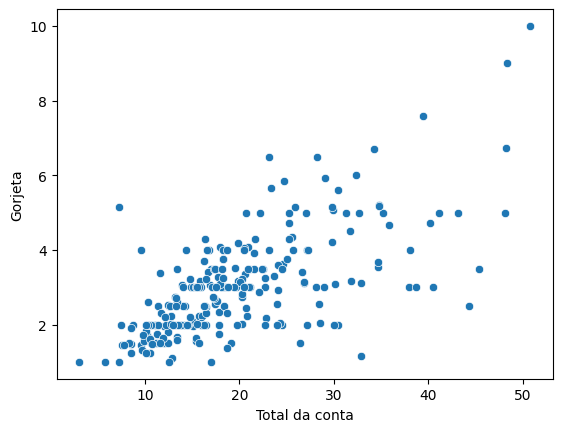

In [56]:
ax = sns.scatterplot(x='Total da conta', y='Gorjeta', data=dados)

**Visualmente o valor da gojeta aumenta conforme o valor da conta aumenta**

In [63]:
print(f'A base de dados contem {dados.shape[0]} registros')
print(f'Quantidade de registros não nulos:\n{dados.count()}')

A base de dados contem 244 registros
Quantidade de registros não nulos:
Total da conta           244
Gorjeta                  244
Sobremesa                244
Dia da semana            244
Horario                  244
Quantidade de pessoas    244
dtype: int64


#### Criando o campo porcentagem

In [64]:
dados.head(1)

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.99,1.01,Não,Dom,Jantar,2


In [70]:
dados['Porcentagem'] = dados['Gorjeta'] / dados['Total da conta']

In [71]:
dados.head(1)

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059447


In [72]:
dados.Porcentagem = dados.Porcentagem.round(2)

In [74]:
dados.head()

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15


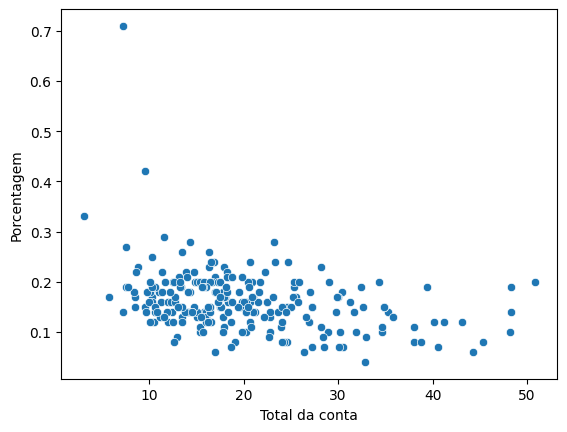

In [75]:
ax = sns.scatterplot(x='Total da conta', y='Porcentagem', data=dados)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


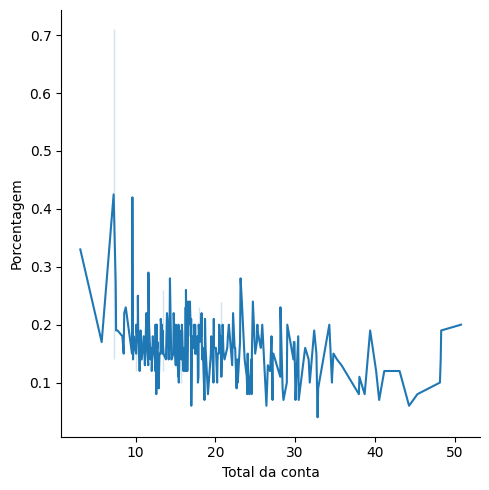

In [77]:
ax = sns.relplot(x='Total da conta', y='Porcentagem', data=dados, kind='line')

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


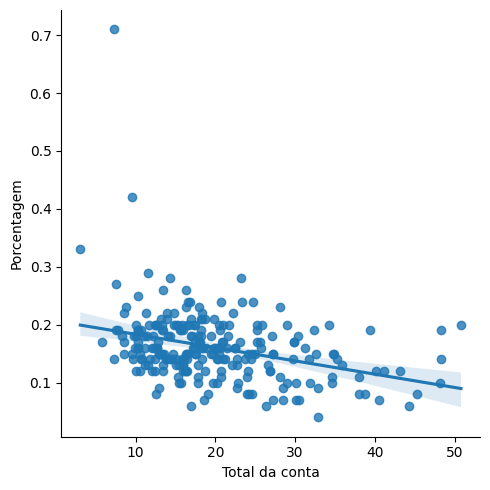

In [78]:
ax = sns.lmplot(x='Total da conta', y='Porcentagem', data=dados)

### Análise 2 - Sobremesa e Gorjeta

In [79]:
dados.head()

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15


In [82]:
dados.loc[dados.Sobremesa == 'Sim'].describe().round(2)

,Total da conta,Gorjeta,Quantidade de pessoas,Porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [83]:
dados.loc[dados.Sobremesa == 'Não'].describe().round(2)

,Total da conta,Gorjeta,Quantidade de pessoas,Porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


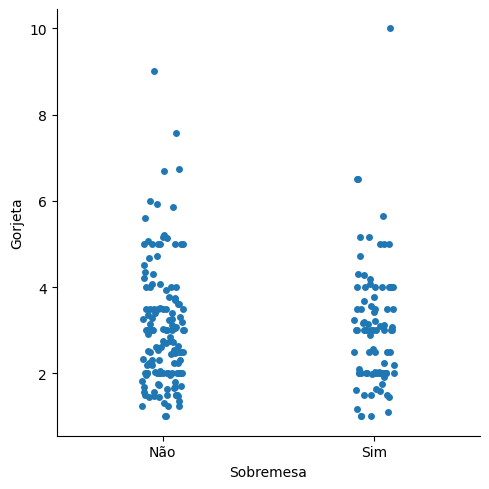

In [84]:
sns.catplot(x='Sobremesa', y='Gorjeta', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


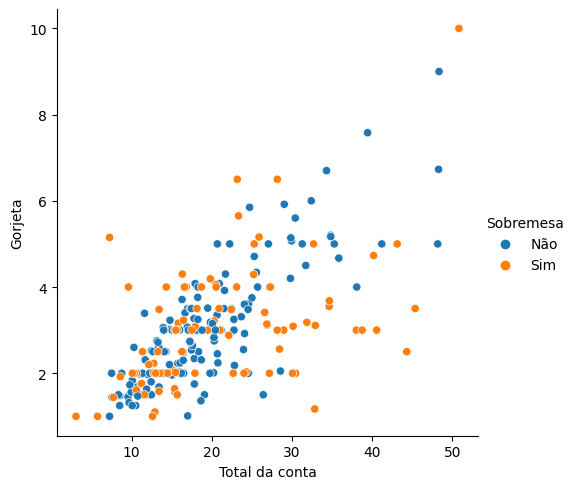

In [85]:
sns.relplot(x='Total da conta', y='Gorjeta', hue='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


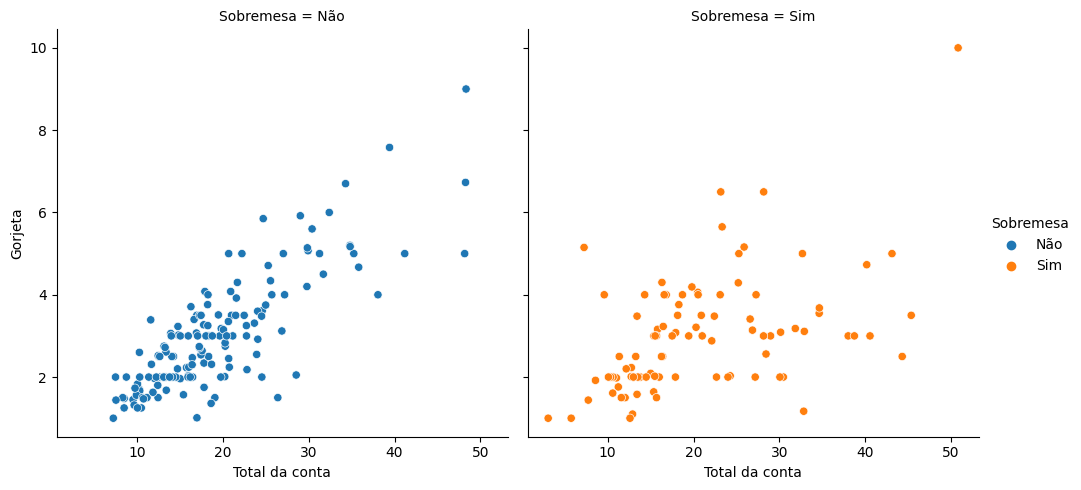

In [88]:
sns.relplot(x='Total da conta', y='Gorjeta', hue='Sobremesa', col='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


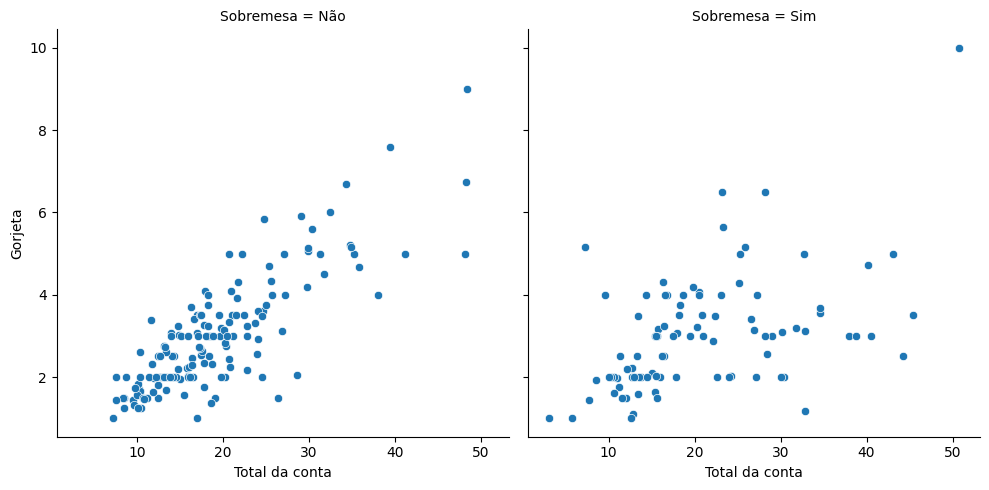

In [89]:
sns.relplot(x='Total da conta', y='Gorjeta', col='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


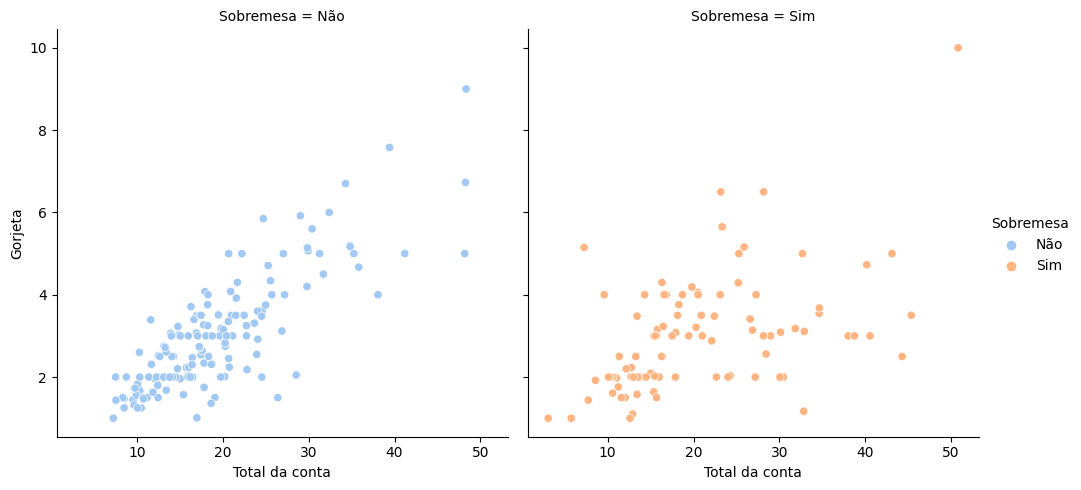

In [90]:
sns.relplot(x='Total da conta', y='Gorjeta', hue='Sobremesa', col='Sobremesa', palette='pastel', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


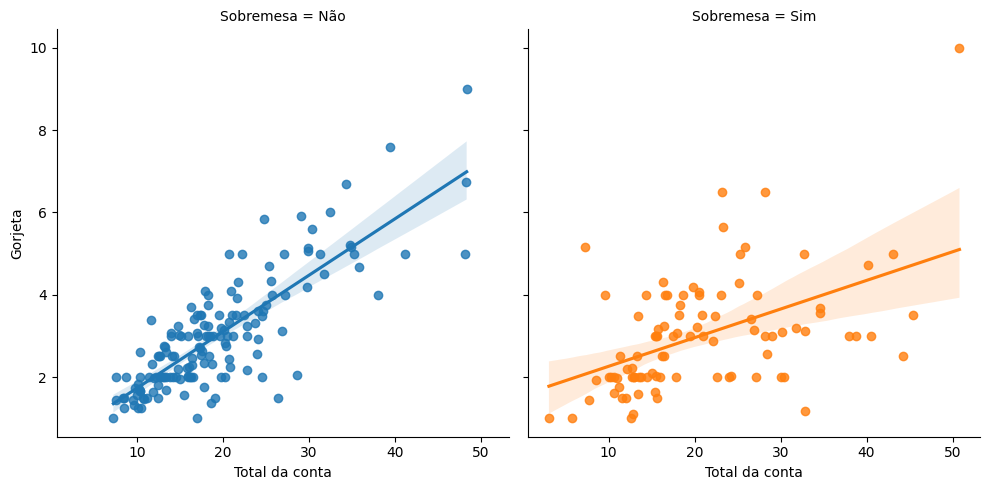

In [91]:
sns.lmplot(x='Total da conta', y='Gorjeta', col='Sobremesa', hue='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


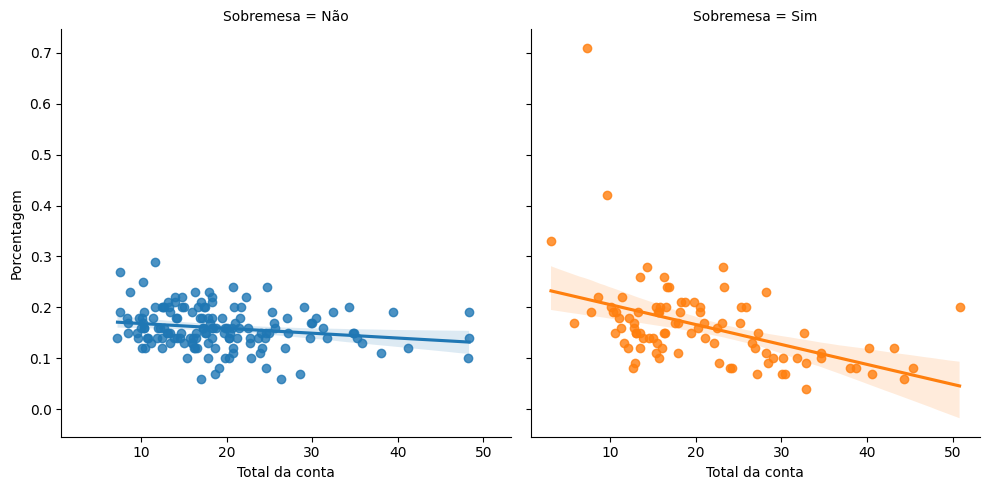

In [92]:
sns.lmplot(x='Total da conta', y='Porcentagem', col='Sobremesa', hue='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


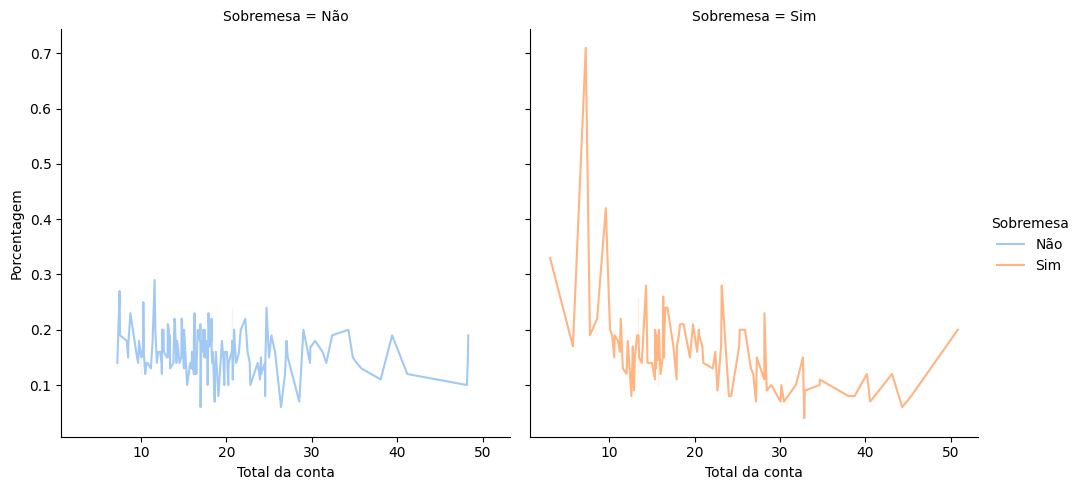

In [ ]:
sns.relplot(x='Total da conta', y='Porcentagem', hue='Sobremesa', col='Sobremesa', kind='line', palette='pastel', data=dados)

**Visualmente existe diferença entre o valor da gorjeta daqueles que pediram sobremesa dos que não pediram**

#### Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [96]:
from scipy.stats import ranksums

In [101]:
sobremesa = dados.query("Sobremesa == 'Sim'").Porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: Porcentagem, Length: 93, dtype: float64

In [102]:
sem_sobremesa = dados.query("Sobremesa == 'Não'").Porcentagem
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: Porcentagem, Length: 151, dtype: float64

In [104]:
r = ranksums(sobremesa, sem_sobremesa)
print(f"O valor do p valor é {r[1]}")

O valor do p valor é 0.5266635660124415


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**